## TAREA_1_Daniel_Rojas

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Metodos no supervisados/Datos_Tarea' )

df=pd.read_csv('incendios_Algeria.csv',index_col=None,delimiter=',',decimal=".")
df.describe()


Temperature          RH          Ws        Rain        FFMC  \
count   122.000000  122.000000  122.000000  122.000000  122.000000   
mean     31.180328   67.975410   16.000000    0.842623   74.672951   
std       3.320401   11.154411    2.848807    2.409208   15.558713   
min      22.000000   45.000000   11.000000    0.000000   28.600000   
25%      29.000000   60.000000   14.000000    0.000000   65.925000   
50%      31.000000   68.000000   16.000000    0.000000   80.900000   
75%      34.000000   77.750000   18.000000    0.500000   86.775000   
max      37.000000   89.000000   26.000000   16.800000   90.300000   

              DMC          DC         ISI         BUI         FWI  
count  122.000000  122.000000  122.000000  122.000000  122.000000  
mean    12.314754   53.160656    3.655738   15.426230    5.577869  
std     11.274360   51.778265    3.021768   14.474302    6.343051  
min      0.700000    6.900000    0.000000    1.100000    0.000000  
25%      3.725000   10.050000    1.125000    5.100000    0.500000  
50%      9.450000   35.550000    2.650000   11.200000    3.000000  
75%     16.300000   79.025000    5.600000   21.675000    8.700000  
max     54.200000  220.400000   12.500000   67.400000   30.200000

Para la temperatura el promedio es de 31,18 C con una desviacion estandar de 3,32 C, la temperatura maxima es de 37C y la minima de 22 C. 
Para la humedad relativa el promedio es de 67,97% con una desviacion estandar de 11,15%, la RH maxima es de 89% y la minima de 45%.
Esto podria realizarse con todas las variables medidas.
Podemos rescatar que la medida con mayor variabilidad es la llamada DC con 51,77 de desviacion estandar y por otra parte la medida con menor variabilidad es el de lluvia con un 2,409. 

In [2]:
correlacion=df.corr()
correlacion

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.660151 -0.228035 -0.486947  0.748423  0.541489   
RH             -0.660151  1.000000  0.245774  0.329163 -0.653153 -0.347080   
Ws             -0.228035  0.245774  1.000000  0.349321 -0.211069  0.039394   
Rain           -0.486947  0.329163  0.349321  1.000000 -0.573476 -0.265371   
FFMC            0.748423 -0.653153 -0.211069 -0.573476  1.000000  0.608512   
DMC             0.541489 -0.347080  0.039394 -0.265371  0.608512  1.000000   
DC              0.532838 -0.314271  0.099231 -0.283652  0.575221  0.962193   
ISI             0.663871 -0.586410 -0.039266 -0.366425  0.790086  0.750098   
BUI             0.542210 -0.338233  0.062212 -0.271951  0.600707  0.995551   
FWI             0.608367 -0.476067  0.029637 -0.292914  0.675553  0.901759   

                   DC       ISI       BUI       FWI  
Temperature  0.532838  0.663871  0.542210  0.608367  
RH          -0.314271 -0.586410 -0.338233 -0.476067  
Ws           0.099231 -0.039266  0.062212  0.029637  
Rain        -0.283652 -0.366425 -0.271951 -0.292914  
FFMC         0.575221  0.790086  0.600707  0.675553  
DMC          0.962193  0.750098  0.995551  0.901759  
DC           1.000000  0.717591  0.982554  0.869911  
ISI          0.717591  1.000000  0.746761  0.944062  
BUI          0.982554  0.746761  1.000000  0.900417  
FWI          0.869911  0.944062  0.900417  1.000000

<AxesSubplot:>

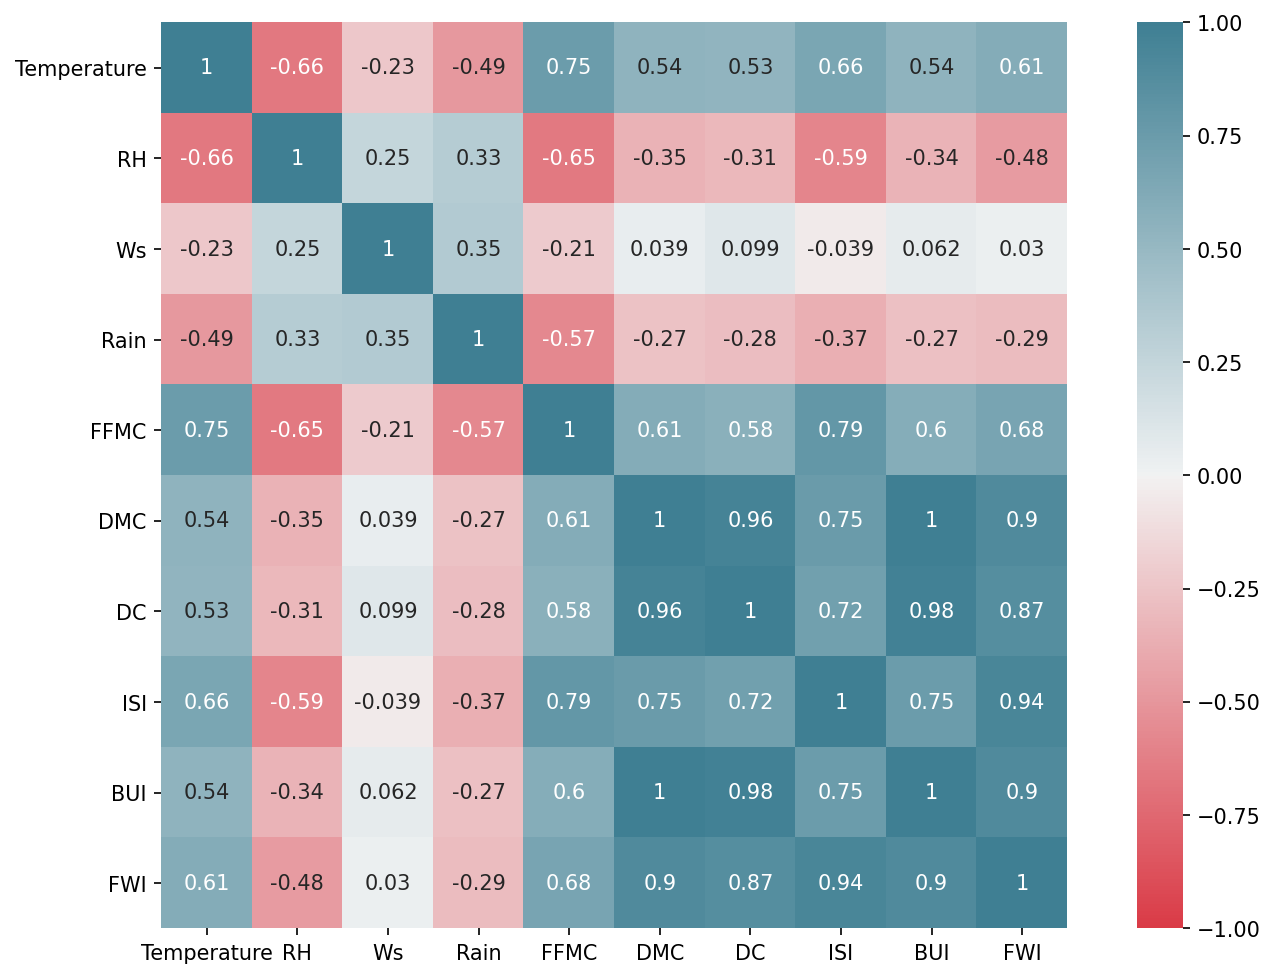

In [3]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 150)

paleta = sns.diverging_palette(220, 10,as_cmap=True).reversed()

sns.heatmap(correlacion, vmin= -1, vmax=1, cmap= paleta,
            square=True, annot=True, ax=ax)

Segun el grafico anterior una correlacion positiva alta de 0,98 de coeficiente de correlacion, se da entre las variables DC y BUI,esto quiere decir que cuando una de las dos variables aumenta, la otra variable tambien lo hace a una taza similar. 

Por otra parte una correlacion negativa destacable de -0,65 de coeficiente de correlacion se da entre las variables FFMC y RH, esto quiere decir que cuando una aumenta la otra disminuye pero en una menor taza en comparacion a las 2 variables ya mencionadas anteriormente. 

En el caso de las variables BUI y DMC hay una correlacion positiva perfecta, osea ambas aumentan o disminuyen a una misma taza. 

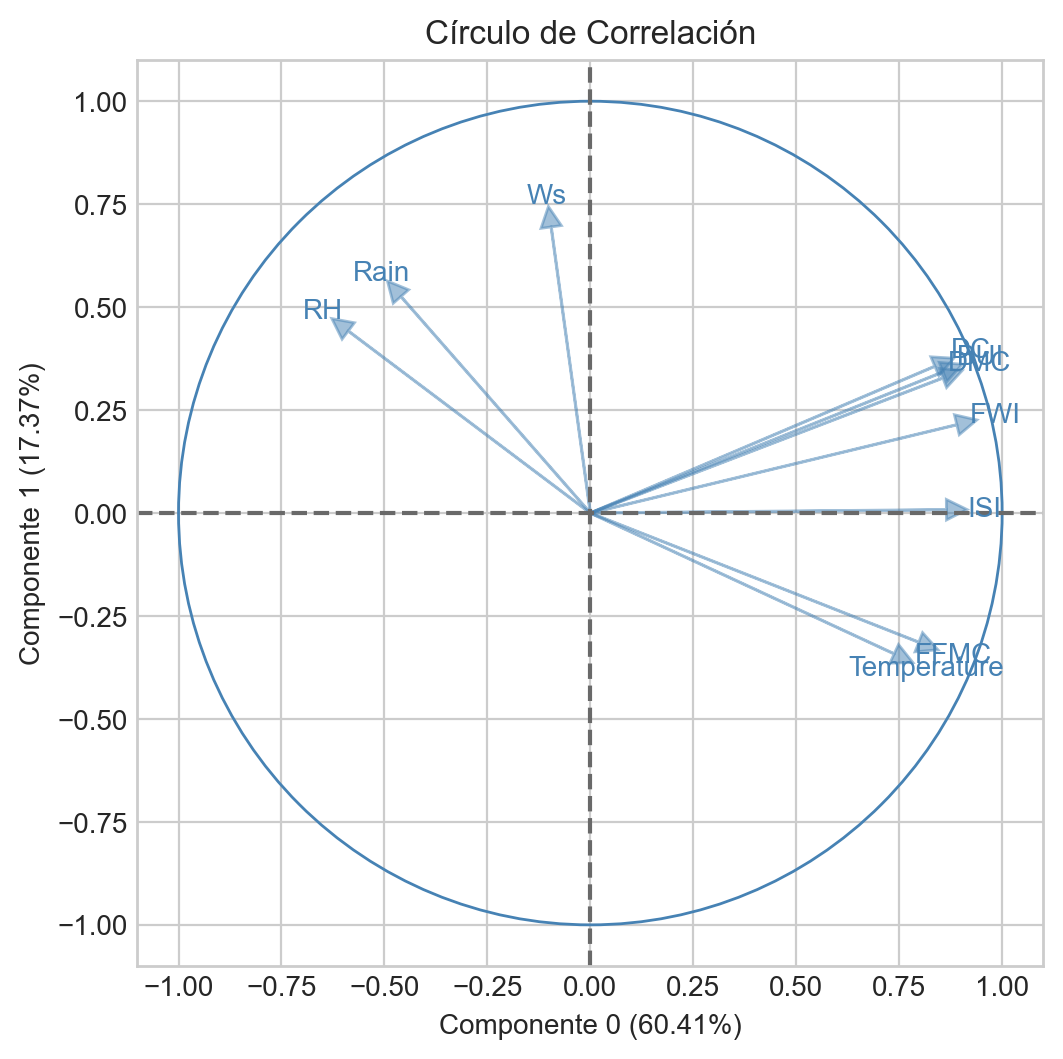

In [8]:
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Git-Promidat/Promidat/Metodos no supervisados' )
from ACP_PRINCE import ACP 
newdf = df.select_dtypes(include=np.number) #elimina la columna string
acp = ACP(newdf,n_componentes=3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_circulo()


<br> 1. Segun el circulo de correlacion las variables FFMC y temperatura estan correlacionadas de manera positiva. 
<br> 2. Ademas las variables DC,DMC,BUI tienen la correlacion mas fuerte entre todas las variables.
<br>3. WS,Rain y RH tienen una correlacion positiva entre si, sin embargo es una correlacion mas debil en comparacion a las demas variables. 

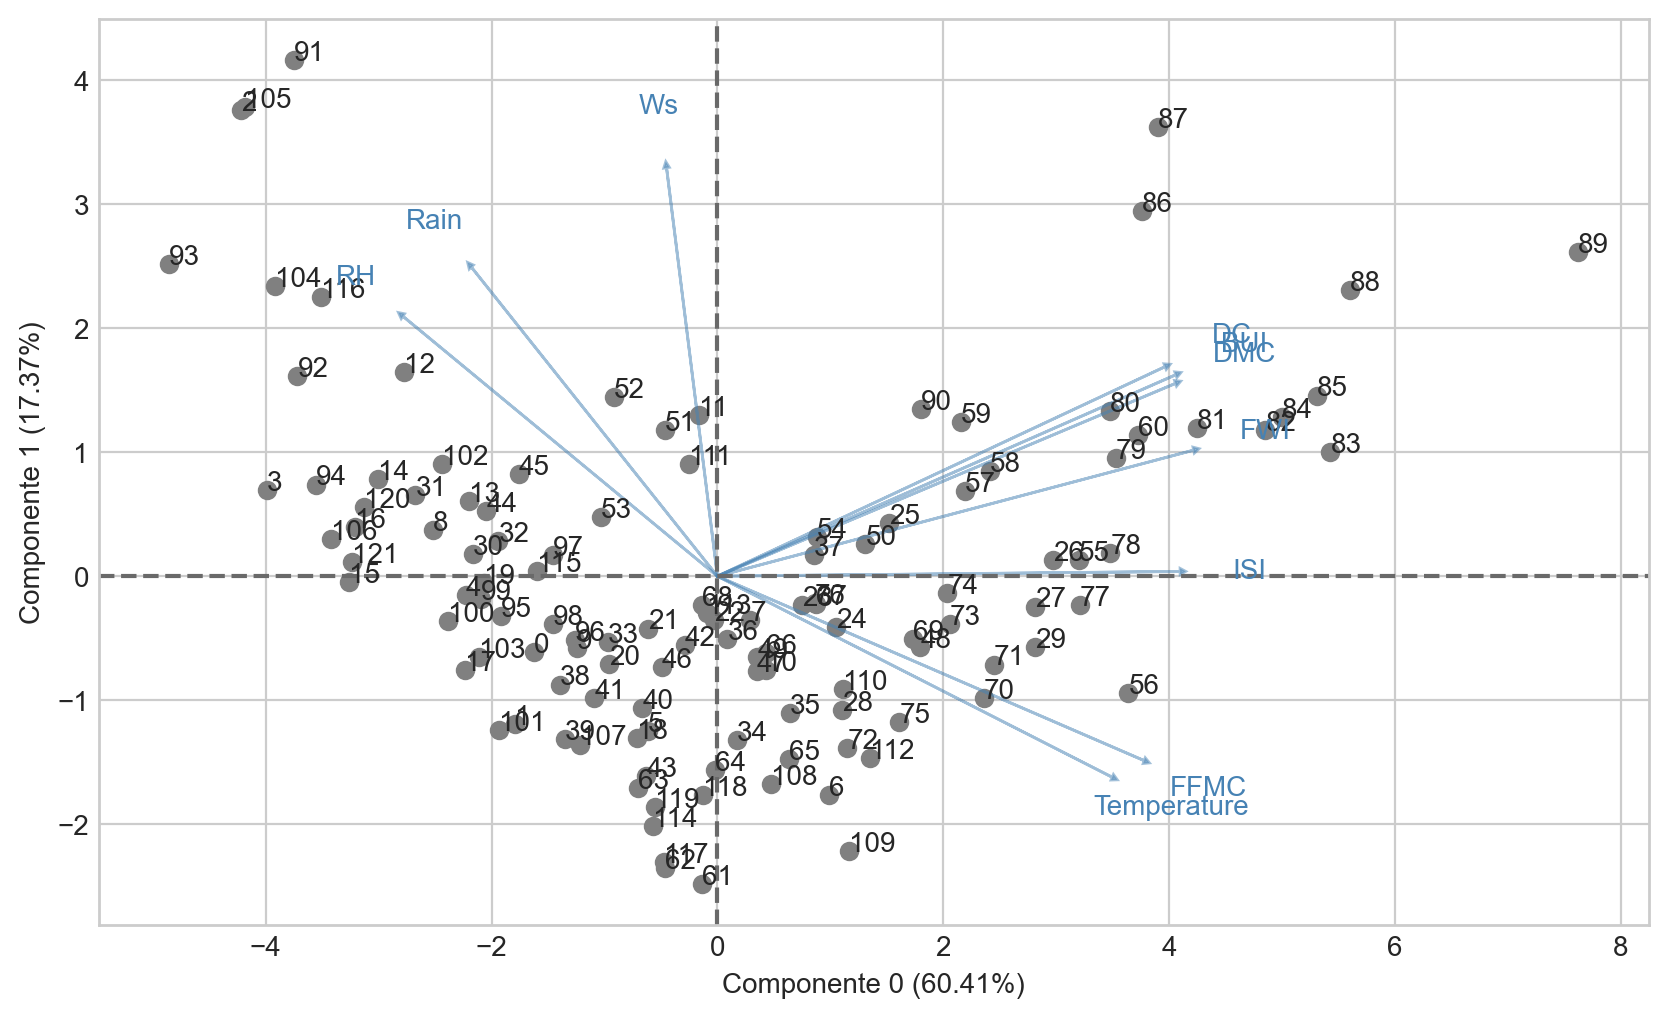

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_sobreposicion()

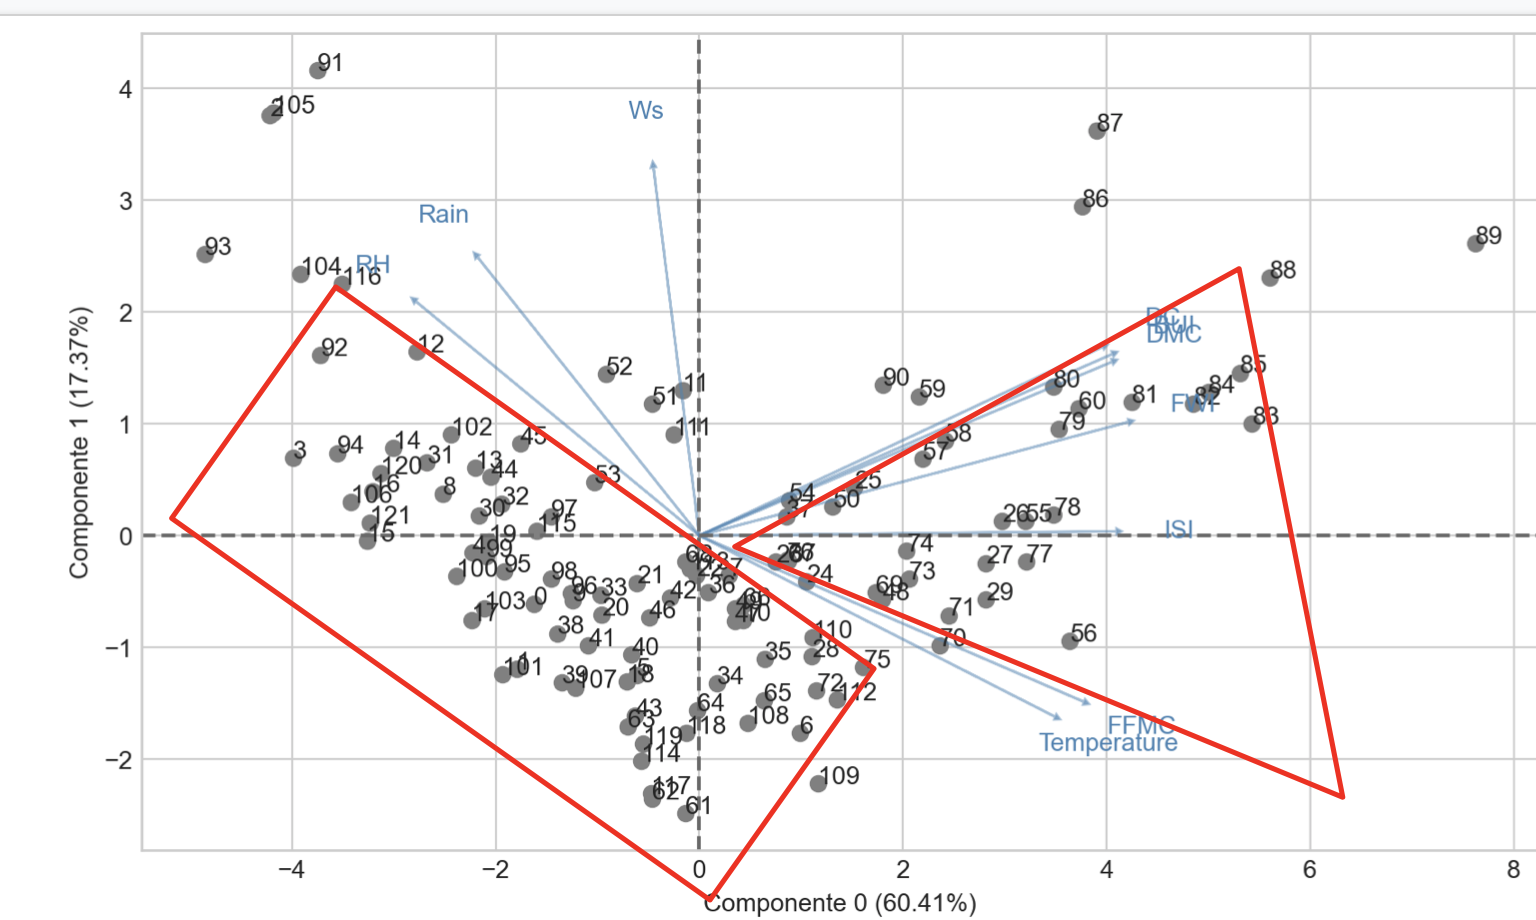

El grafico anterior nos permite decir que probablemente existen 2 agrupaciones que estan mayoritariamente representados por: 
1. Los elementos de los cuadrantes 1,3,4 que estan por debajo de los vectores de temperatura, RH. Las variables dominantes son Temp y RH y al ser de correlacion inversa provoca el comportamiento de que esten por debajo de los vectores. 
2. Los elementos de los cuadrantes 2 y 4 y que estan entre FFMC y DMC. Y al tener cierta correlacion positiva provoca que los elementos esten dentro de ambos vectores. 
3. Los demas elementos que no se pueden asociar a esos 2 clusters visuales, se deberian de utilizar un metodo de clusterizacion y asi determinar una asociacion correcta.

In [12]:
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Metodos no supervisados/Datos_Tarea' )

df=pd.read_csv('players1.csv',index_col=None,delimiter=',')
newdf = df.select_dtypes(include=np.number) #elimina la columna string
acp = ACP(newdf,n_componentes=3)

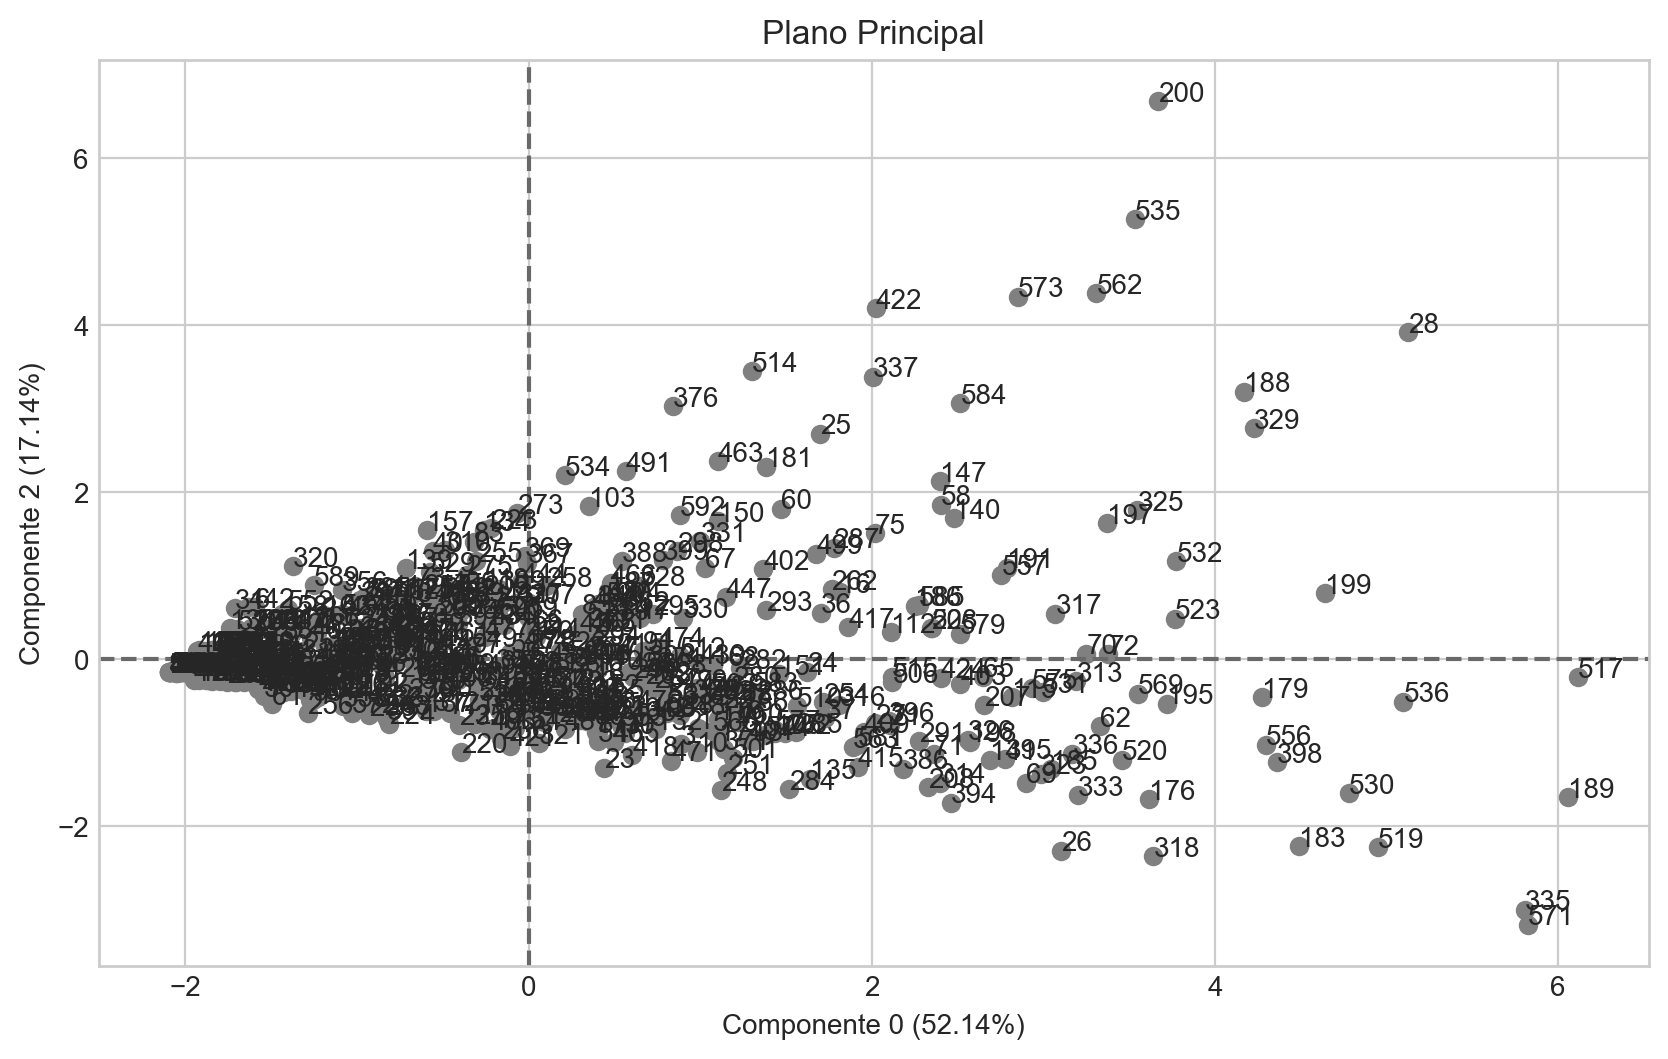

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_plano_principal(ejes = [0, 2])

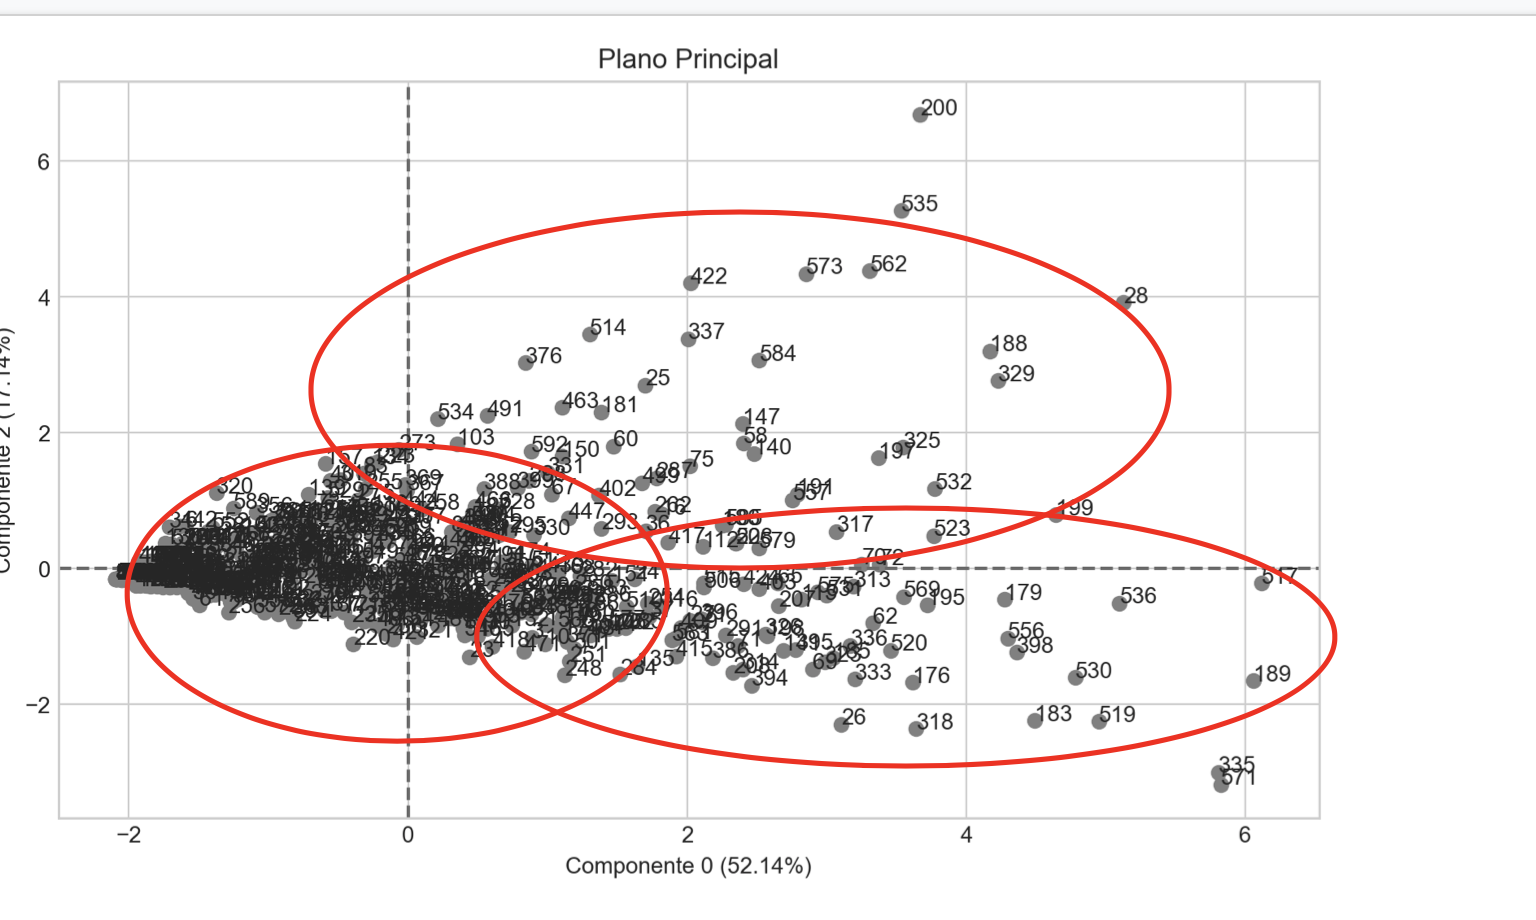

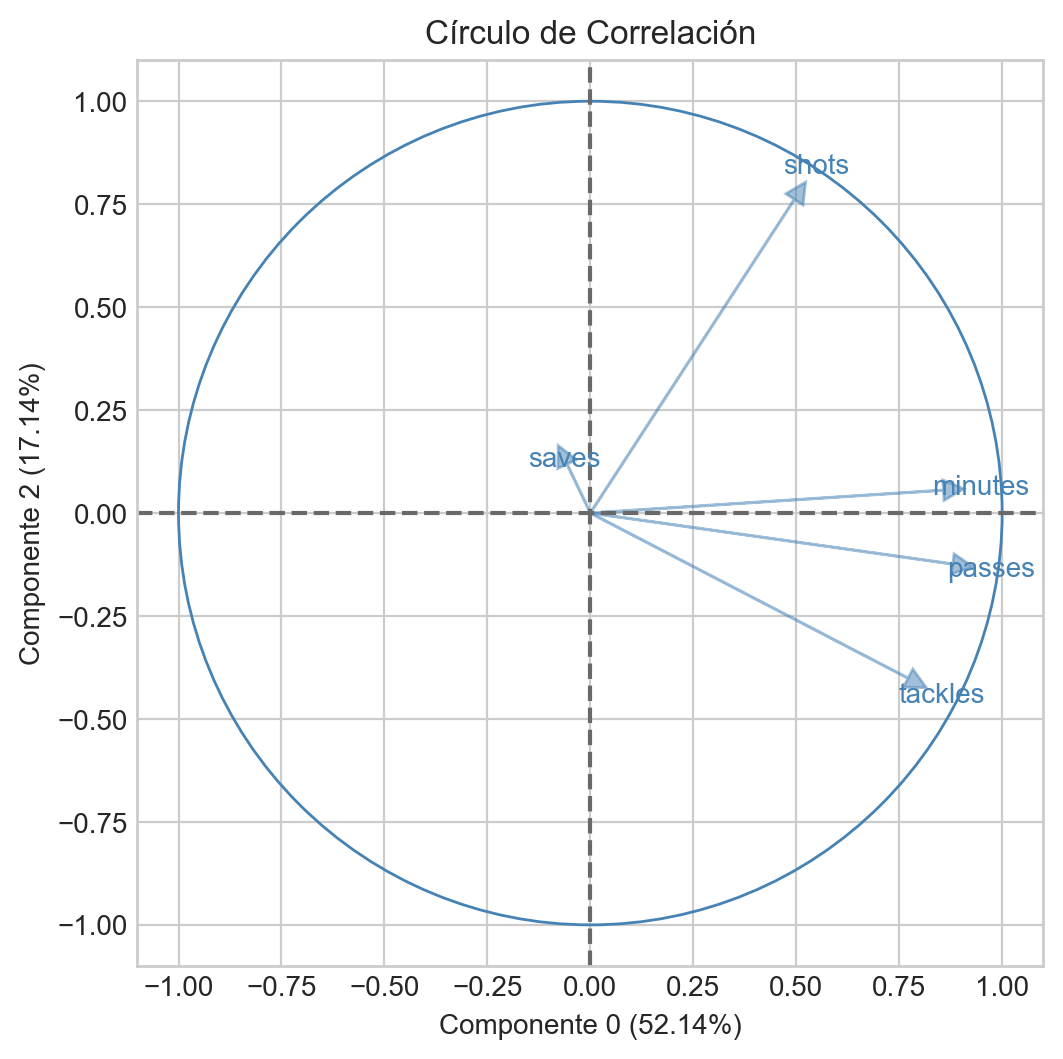

In [14]:
# Plotea el círculo de correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_circulo(ejes = [0, 2])

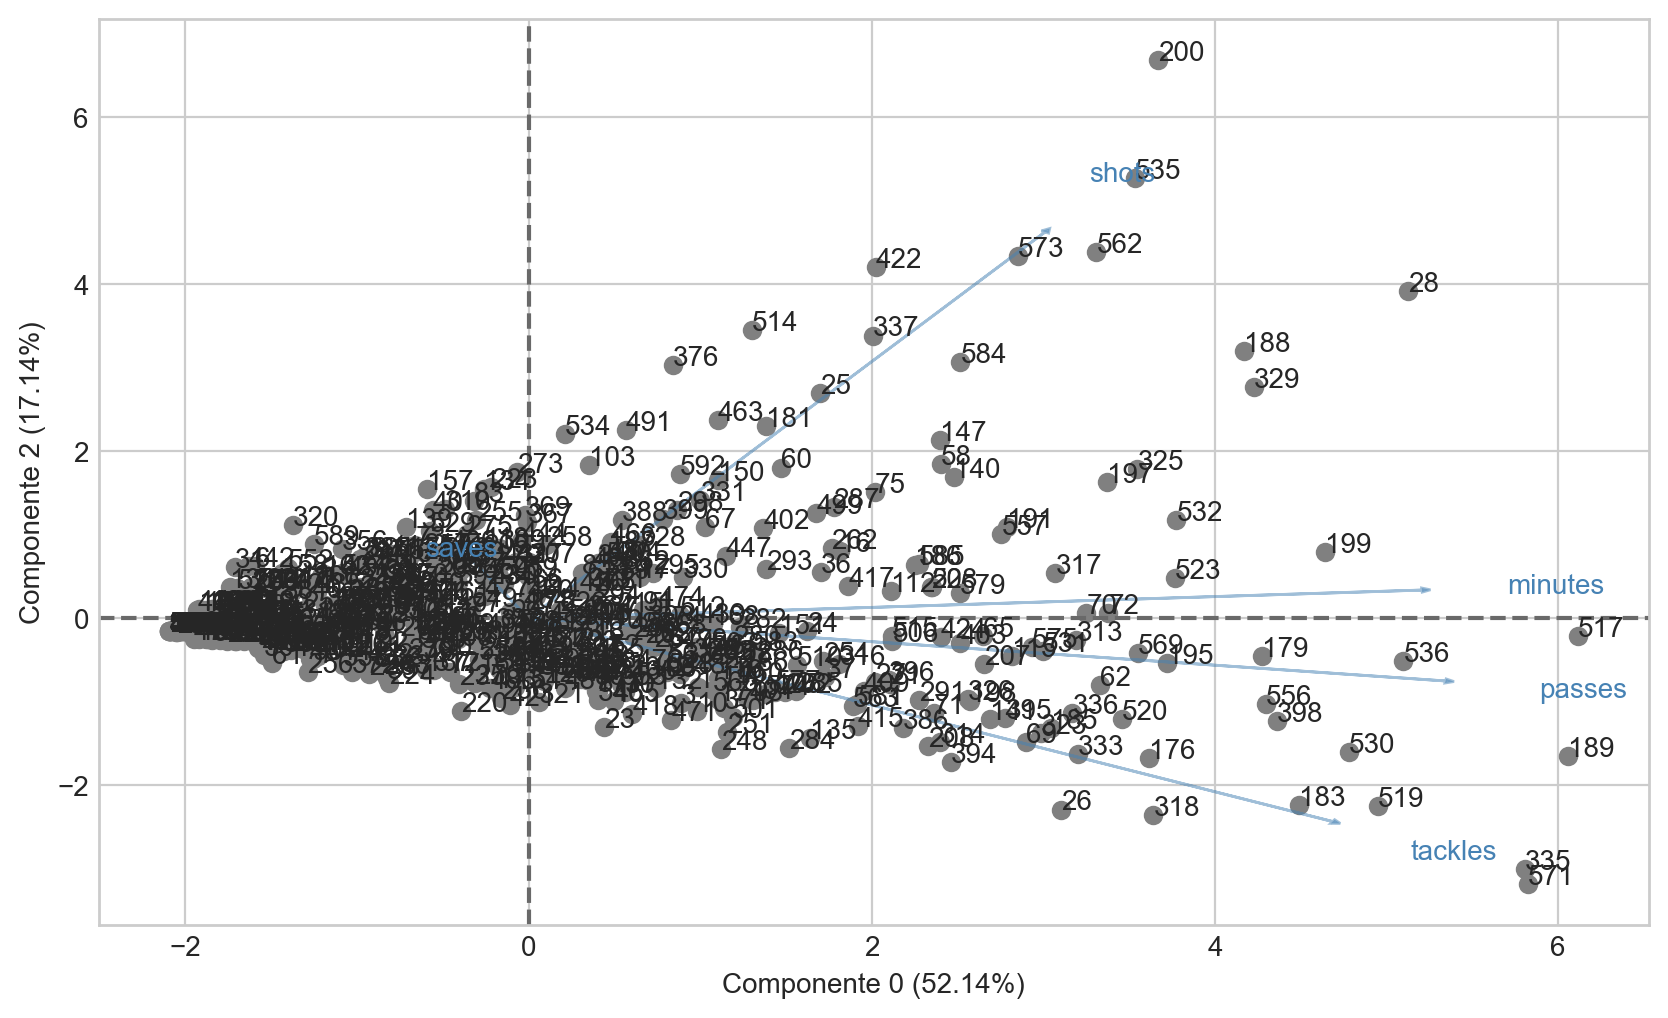

In [15]:
# Plotea la sobreposición plano-correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_sobreposicion(ejes = [0, 2])